In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# !cd '/content/drive/My Drive/Colab Notebooks/COMP596/project' && git clone https://github.com/stellargraph/stellargraph.git
!cd '/content/drive/My Drive/Colab Notebooks/COMP596/project/stellargraph' && pip3 install .
!cd '/content/drive/My Drive/Colab Notebooks/COMP596/project/stellargraph' && pip3 install .[demos]
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/COMP596/project/utils')

Processing /content/drive/My Drive/Colab Notebooks/COMP596/project/stellargraph
     |████████████████████████████████| 109.2MB 28kB/s 
     |████████████████████████████████| 491kB 43.0MB/s 
     |████████████████████████████████| 3.2MB 43.8MB/s 
  Created wheel for stellargraph: filename=stellargraph-0.9.0b0-cp36-none-any.whl size=180400 sha256=b6bcebd90ebd5c0d864835f12dcf55f6349dbba4b9edb61ca19b335f2cac1b65
  Stored in directory: /tmp/pip-ephem-wheel-cache-_kf8owxd/wheels/f9/3e/88/02cbb1e1461628624b4d33f2a263bbe06bc8a9ceff4aaccd0c
Successfully built stellargraph
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-

In [0]:
import os
import random
from operator import itemgetter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook
from scipy import sparse

from sklearn.metrics import roc_auc_score, roc_curve, mean_absolute_error, mean_squared_error
from sklearn import preprocessing, feature_extraction, model_selection

import networkx as nx
from networkx.algorithms import bipartite

import stellargraph as sg
from stellargraph.mapper import HinSAGELinkGenerator
from stellargraph.layer import HinSAGE, link_regression
from tensorflow.keras import Model, optimizers, losses, metrics

import multiprocessing

PROJECT_DIR = os.path.abspath('/content/drive/My Drive/Colab Notebooks/COMP596/project/')
DATA_DIR = os.path.join(PROJECT_DIR, 'data')
ML_1M_DIR = os.path.join(DATA_DIR, 'ml-1m')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [0]:
from utils import create_movielens_graph, load_movies_formatted, apply_features, load_users, delete_bipartite_attribute, sample, create_user_features

In [0]:
graph = create_movielens_graph(ML_1M_DIR)

In [0]:
user_df = load_users(ML_1M_DIR)
user_features = create_user_features(user_df)
movie_features = load_movies_formatted(ML_1M_DIR)

In [0]:
graph = apply_features(graph, user_features, bipartite_set='u')
graph = apply_features(graph, movie_features, bipartite_set='m')
del user_features, movie_features

In [0]:
users, movies = bipartite.sets(graph)
non_edges = [edge for edge in list(nx.non_edges(graph)) if edge[0] in users and edge[1] in movies]
sampled_non_edges = sample(non_edges, num_samples=graph.number_of_edges())
sampled_non_edges = [(edge[0], edge[1], {'rating': 0}) for edge in sampled_non_edges]

edges = list(graph.edges(data=True))
edges.extend(sampled_non_edges)
del non_edges, sampled_non_edges

In [0]:
# delete_bipartite_attribute(graph)

In [0]:
edges = list(graph.edges(data=True))

In [0]:
test_metrics = model.evaluate_generator(gen_test, verbose=1, use_multiprocessing=True, 
                                        workers=num_workers)

print("Untrained model's Test Evaluation:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

1563/1563 [==============================] - 52s 33ms/step - loss: 14.6519 - root_mean_square_error: 3.8256 - mean_absolute_error: 3.6575
Untrained model's Test Evaluation:
	loss: 14.6519
	root_mean_square_error: 3.8256
	mean_absolute_error: 3.6575


## For 3 Runs

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Run [0]
link_regression: using 'concat' method to combine node embeddings into edge embeddings
Epoch 1/3
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
12503/12503 [==============================] - 519s 42ms/step - loss: 1.1530 - root_mean_square_error: 1.0692 - mean_absolute_error: 0.8704 - val_loss: 1.1375 - val_root_mean_square_error: 1.0623 - val_mean_absolute_error: 0.8567
Epoch 2/3
12503/12503 [==============================] - 465s 37ms/step - loss: 1.1286 - root_mean_square_error: 1.0587 - mean_absolute_error: 0.8606 - val_loss: 1.1300 - val_root_mean_square_error: 1.0590 - val_mean_absolute_error: 0.8614
Epoch 3/3
12503/12503 [==============================] - 481s 38ms/step - loss: 1.1229 - root_mean_square_error: 1.0560 - mean_absolute_error: 0.8582 - val_loss: 1.1289 - val_root_mean_square_error: 1.0582 - val_m

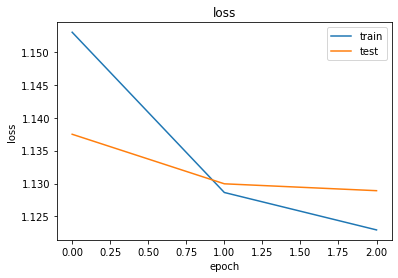

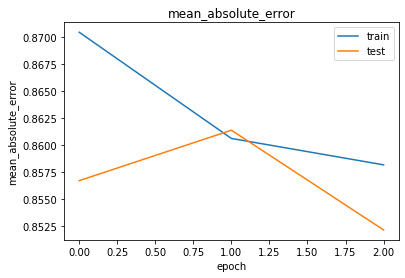

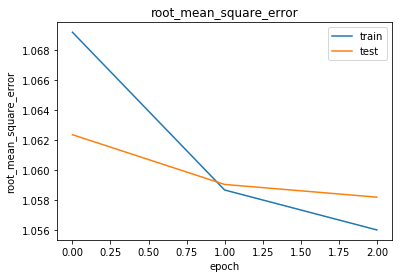

1563/1563 [==============================] - 60s 38ms/step - loss: 1.1289 - root_mean_square_error: 1.0586 - mean_absolute_error: 0.8529
Test Evaluation:
	loss: 1.1289
	root_mean_square_error: 1.0586
	mean_absolute_error: 0.8529
Mean Baseline Test set metrics:
	root_mean_square_error =  1.1188502408868852
	mean_absolute_error =  0.9354915048242244

Model Test set metrics:
	root_mean_square_error =  1.0623431114026314
	mean_absolute_error =  0.8528331681276878
Run [1]
link_regression: using 'concat' method to combine node embeddings into edge embeddings
Epoch 1/3
12503/12503 [==============================] - 367s 29ms/step - loss: 1.1400 - root_mean_square_error: 1.0602 - mean_absolute_error: 0.8618 - val_loss: 1.1243 - val_root_mean_square_error: 1.0567 - val_mean_absolute_error: 0.8638
Epoch 2/3
12503/12503 [==============================] - 356s 28ms/step - loss: 1.1186 - root_mean_square_error: 1.0539 - mean_absolute_error: 0.8560 - val_loss: 1.1262 - val_root_mean_square_error: 1.

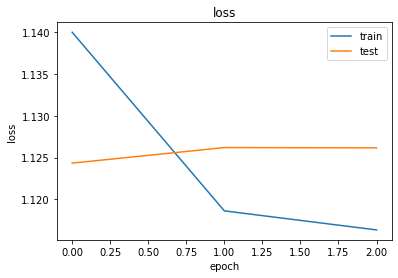

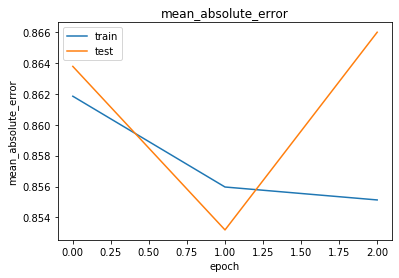

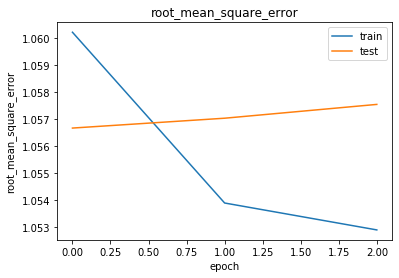

1563/1563 [==============================] - 35s 22ms/step - loss: 1.1238 - root_mean_square_error: 1.0567 - mean_absolute_error: 0.8659
Test Evaluation:
	loss: 1.1238
	root_mean_square_error: 1.0567
	mean_absolute_error: 0.8659
Mean Baseline Test set metrics:
	root_mean_square_error =  1.1188502408868852
	mean_absolute_error =  0.9354915048242244

Model Test set metrics:
	root_mean_square_error =  1.0607354749475821
	mean_absolute_error =  0.8665681722119555
Run [2]
link_regression: using 'concat' method to combine node embeddings into edge embeddings
Epoch 1/3
12503/12503 [==============================] - 358s 29ms/step - loss: 1.1327 - root_mean_square_error: 1.0572 - mean_absolute_error: 0.8592 - val_loss: 1.1201 - val_root_mean_square_error: 1.0545 - val_mean_absolute_error: 0.8608
Epoch 2/3
12503/12503 [==============================] - 353s 28ms/step - loss: 1.1148 - root_mean_square_error: 1.0522 - mean_absolute_error: 0.8541 - val_loss: 1.1193 - val_root_mean_square_error: 1.

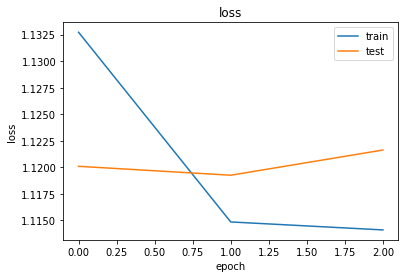

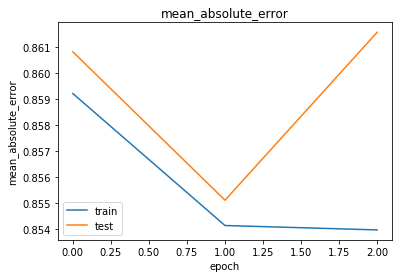

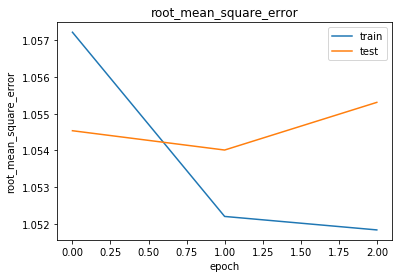

1563/1563 [==============================] - 36s 23ms/step - loss: 1.1195 - root_mean_square_error: 1.0545 - mean_absolute_error: 0.8614
Test Evaluation:
	loss: 1.1195
	root_mean_square_error: 1.0545
	mean_absolute_error: 0.8614
Mean Baseline Test set metrics:
	root_mean_square_error =  1.1188502408868852
	mean_absolute_error =  0.9354915048242244

Model Test set metrics:
	root_mean_square_error =  1.0584013015766498
	mean_absolute_error =  0.8617407910566693


In [0]:
# When sampling the GraphSAGE subgraphs, we want to treat user-movie links as undirected
G = sg.StellarGraph(graph, node_features="feature")
# print(G.info())
batch_size = 64
num_samples =  [8, 4]
generator = HinSAGELinkGenerator(
            G,
            batch_size,
            num_samples,
            head_node_types=['user', 'movie'])

hinsage_layer_sizes = [32, 32]
assert len(hinsage_layer_sizes) == len(num_samples)

hinsage = HinSAGE(layer_sizes=hinsage_layer_sizes, 
                  generator=generator, 
                  bias=True, 
                  dropout=0)

import tensorflow.keras.backend as K
def root_mean_square_error(s_true, s_pred):
    return K.sqrt(K.mean(K.pow(s_true - s_pred, 2)))
num_workers = multiprocessing.cpu_count()

import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(history):
    metrics = sorted(history.history.keys())
    metrics = metrics[:len(metrics)//2]
    for m in metrics:
        # summarize history for metric m
        plt.plot(history.history[m])
        plt.plot(history.history['val_' + m])
        plt.title(m)
        plt.ylabel(m)
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='best')
        plt.show()

scores = []
for i in range(3):
    print(f'Run [{i}]')
    # 80% Train, 10% Val, 10% Test
    edges_train, edges_test = model_selection.train_test_split(edges, train_size=0.8, random_state=42)
    edges_val, edges_test = model_selection.train_test_split(edges_test, train_size=0.5, random_state=42)

    edgelist_train = [(e[0],e[1]) for e in edges_train]
    edgelist_val = [(e[0],e[1]) for e in edges_val]
    edgelist_test = [(e[0],e[1]) for e in edges_test]

    labels_train = [e[2]["rating"] for e in edges_train]
    labels_val = [e[2]["rating"] for e in edges_val]
    labels_test = [e[2]["rating"] for e in edges_test]

    gen_train = generator.flow(edgelist_train, labels_train, shuffle=True)
    gen_val = generator.flow(edgelist_val, labels_val)
    gen_test = generator.flow(edgelist_test, labels_test)

    # Expose input and output sockets of hinsage:
    x_inp, x_out = hinsage.build()
    # Final estimator layer
    score_prediction = link_regression(edge_embedding_method='concat')(x_out)

    model = Model(inputs=x_inp, outputs=score_prediction)
    model.compile(
        optimizer=optimizers.Adam(lr=1e-2),
        loss=losses.mean_squared_error,
        metrics=[root_mean_square_error, metrics.mae],
    )

    epochs = 3
    history = model.fit_generator(
                gen_train,
                validation_data=gen_val,
                epochs=epochs,
                verbose=1,
                shuffle=False,
                use_multiprocessing=True,
                workers=num_workers,
            )

    plot_history(history)

    test_metrics = model.evaluate_generator(gen_test, use_multiprocessing=True, workers=num_workers, verbose=1)

    print("Test Evaluation:")
    for name, val in zip(model.metrics_names, test_metrics):
        print("\t{}: {:0.4f}".format(name, val))

    y_true = labels_test
    # Predict the rankings using the model:
    y_pred = model.predict_generator(gen_test)
    # Mean baseline rankings = mean movie ranking:
    y_pred_baseline = np.full_like(y_pred, np.mean(y_true))

    rmse = np.sqrt(mean_squared_error(y_true, y_pred_baseline))
    mae = mean_absolute_error(y_true, y_pred_baseline)
    print("Mean Baseline Test set metrics:")
    print("\troot_mean_square_error = ", rmse)
    print("\tmean_absolute_error = ", mae)

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print("\nModel Test set metrics:")
    print("\troot_mean_square_error = ", rmse)
    print("\tmean_absolute_error = ", mae)
    scores.append(rmse)

In [0]:
np.average(scores)

1.060493295975621